<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Import Libraries
</h1>

In [137]:
# for read and write in dataset structure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy.io import loadmat
import os


# for fourier transform
from numpy.fft import fft, rfft

# to plot spectrogram
from scipy.signal import spectrogram

from scipy.fftpack import fft, ifft
from scipy.signal import butter, lfilter

# for t_test and p_value
import scipy.stats as stats


# Import the required libraries for machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Import models and accuracy algorithms 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# method 1 : to calculate accuracy 
from sklearn.metrics import accuracy_score

# method 2 : to calculate accuracy 
from sklearn.model_selection import cross_val_score

# method 3 : to calculate accuracy (best for binary classification)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns

# library for calculate precision and recall  and f1_score
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import f1_score

# library for calculate and plot statistics variable
from sklearn.metrics import precision_recall_curve

# for Naive Bayes classifier model
from sklearn.naive_bayes import BernoulliNB

# metric for binary classification  
from sklearn.metrics import roc_auc_score

# for calculate FPR and TPR and plot ROC curve
from sklearn.metrics import roc_curve

# library for grid search and random grid search : 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform
from scipy.stats import randint

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Import Datasets
</h1>

In [138]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Load dataset :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

file_name = ["H1.mat", "H2.mat", "H3.mat", "Sch1.mat", "Sch2.mat", "Sch3.mat"]
# مسیر محل ذخیره فایل در سیستم
save_directory = "Dataset"  # نام پوشه


datasets = []

for file in file_name:
    save_path = os.path.join(save_directory, file)
    # read data
    datasets.append(loadmat(save_path))

In [139]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# extract eeg_signal from dataset and combine into single 3D array .
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

print(np.shape(datasets))
for i in range(0, len(datasets)):
    print(datasets[i].keys())

file_name = ["H1", "H2", "H3", "Sch1", "Sch2", "Sch3"]


def extract_eeg_signal(datasets, file_name):
    for i in range(len(datasets)):
        signals = []
        for name in file_name:
            current_signal = datasets[i][name]
            signals.append(current_signal[:, :211001])
            print(f"Shape of {name} in dataset {i}: {np.shape(current_signal)}")
            i += 1
            if i == len(datasets):
                return signals
                break


eeg_signals = extract_eeg_signal(datasets, file_name)
eeg_signals_np = np.array(eeg_signals)
print(np.shape(eeg_signals_np))

(6,)
dict_keys(['__header__', '__version__', '__globals__', 'H1'])
dict_keys(['__header__', '__version__', '__globals__', 'H2'])
dict_keys(['__header__', '__version__', '__globals__', 'H3'])
dict_keys(['__header__', '__version__', '__globals__', 'Sch1'])
dict_keys(['__header__', '__version__', '__globals__', 'Sch2'])
dict_keys(['__header__', '__version__', '__globals__', 'Sch3'])
Shape of H1 in dataset 0: (19, 231250)
Shape of H2 in dataset 1: (19, 227500)
Shape of H3 in dataset 2: (19, 227500)
Shape of Sch1 in dataset 3: (19, 211250)
Shape of Sch2 in dataset 4: (19, 286250)
Shape of Sch3 in dataset 5: (19, 241000)
(6, 19, 211001)


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Signal Filtering
</h1>

In [140]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# default parameters and function :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

sampling_freq = 250
n_trials = np.shape(eeg_signals)[2]
time_direction = np.arange(0, n_trials) / sampling_freq
delta_t = time_direction[1] - time_direction[0]
sampling_freq_2 = 1 / delta_t
whole_time = n_trials * delta_t

df = 1 / time_direction.max()  # Determine frequency resolution
fNQ = 1 / delta_t / 2  # Determine Nyquist frequency
faxis = np.arange(0, fNQ, df)  # Construct frequency axis


print("sampling_freq = ", sampling_freq)
print("trials = ", n_trials)
print(time_direction)
print(len(time_direction))
print("sampling time : ", int(delta_t * 10**3), " ms ")
print(delta_t)
print("sampling_freq_2 = ", sampling_freq_2)
print("sampling direction (second) : ", np.max(time_direction))
print("sampling direction (minute) : ", int(np.max(time_direction) / 60))


def plot_spectrum(eeg_signal, channel_num):
    eeg_signal = np.array(eeg_signal)
    for sample in range(np.shape(eeg_signal)[0]):
        # calculate fft :
        signal_freq = fft(
            eeg_signal[sample, channel_num, :]
            - eeg_signal[sample, channel_num, :].mean()
        )  # Compute Fourier transform of x
        # print(np.shape(signal_freq))

        # Complex Conjugate of fft result :
        # freq_conjugate = signal_freq.conj()
        # print(np.shape(freq_conjugate))

        # print 5 row of data
        # print(pd.DataFrame(signal_freq).head(5))
        # print(pd.DataFrame(freq_conjugate).head(5))

        Sxx = (
            2 * delta_t**2 / whole_time * (signal_freq * signal_freq.conj())
        )  # Compute spectrum
        Sxx = Sxx[: int(n_trials / 2)]  # Ignore negative frequencies

        plt.figure(figsize=(24, 6))
        plt.plot(faxis, Sxx.real)  # Plot spectrum vs frequency
        plt.xlim([0, 100])  # Select frequency range
        if sample <= 3:
            plt.title(f"healthy sample {sample + 1} channel {channel_num} ")
        if sample > 3 and sample <= 6:
            plt.title(f"Schizophrenia sample {sample + 1} channel {channel_num} ")
        plt.xlabel("Frequency [Hz]")  # Label the axes
        plt.ylabel("Power [$\mu V^2$/Hz]")
        if sample == np.shape(eeg_signal)[0] - 1:
            break

    plt.show()


def plot_spectrograms(eeg_signal, channel_num, overlap, nfft):
    eeg_signal = np.array(eeg_signal)
    number_of_subplot = 6
    num_rows = 3
    num_cols = 2
    plot_num = 0
    plt.figure(figsize=(24, 24))

    while plot_num <= int(number_of_subplot) + 1:
        # print(plot_num)
        if plot_num == 6:
            break

        for sample in range(np.shape(eeg_signal)[0]):
            # print(plot_num)
            plt.subplot(num_rows, num_cols, int(plot_num + 1))
            freqs, times, Sxx = spectrogram(
                eeg_signal[sample, channel_num, :],
                fs=sampling_freq,
                nperseg=nfft,
                noverlap=overlap,
            )
            plt.pcolormesh(times, freqs, 10 * np.log10(Sxx), cmap="jet")
            plt.colorbar()  # ... with a color bar,
            plt.ylim([0, 100])  # ... set the frequency range,
            plt.xlabel("Time [s]")  # ... and label the axes
            plt.ylabel("Frequency [Hz]")
            plot_num = plot_num + 1

    plt.tight_layout()
    plt.show()


# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# band pass filter to extract range of frequencies
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████


# Function to design a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return b, a


# Function to apply a bandpass filter to a signal
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# create subplot for each sample band frequency
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# set defaults
Vertical_space = -30


# function to plot eeg signals
def plot_subplot(EEG_signal, time_axis, band_freq):
    i = 0
    for phase in range(EEG_signal.shape[0]):
        phase_signal = EEG_signal.iloc[phase, :] + phase * Vertical_space
        plt.plot(time_axis, phase_signal)
        phase_lable = [
            "healthy",
            "healthy",
            "healthy",
            "Schizophrenia",
            "Schizophrenia",
            "Schizophrenia",
        ]
        phase_pos = np.arange(EEG_signal.shape[0]) * Vertical_space
        plt.yticks(phase_pos, phase_lable)
        plt.title(f"frequency band : {band_freq[0]}Hz to {band_freq[1]}Hz")
        plt.xlabel("Time(s)")
        plt.ylabel("phase_0")
        # if (i <= 5):
        #     i += i

        # plt.title(f'EEG signal range {time_axis[0]} to {time_axis[-1]}')
        # savefig(f"./Plot/subplot_between {time_axis[0]} to {time_axis[-1]}", format="PNG")
    plt.show()


# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# subplot for 7 - 9 frequencies for each phase :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████


def filter_data_and_plot(eeg_signal, channel, lowcut, highcut, time_direction):
    filtered_eeg_signal = []

    for i in np.arange(np.shape(eeg_signal)[0]):
        filtered_eeg_signal.append(
            butter_bandpass_filter(
                eeg_signal[i, channel, :], lowcut, highcut, fs=250, order=4
            )
        )

    plt.figure(figsize=(18, 18))
    filtered_eeg_signal_df = pd.DataFrame(filtered_eeg_signal)
    print(filtered_eeg_signal_df.shape)
    plot_subplot(filtered_eeg_signal_df, time_direction, band_freq=[lowcut, highcut])


# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# function to segmentation dataset
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████


def segment_data(eeg_signals, segment_direction, frequency):
    time_direction = np.arange(0, np.shape(eeg_signals)[2]) / frequency
    segment_number = int(np.max(time_direction) / segment_direction)
    slide = int(segment_direction * frequency)
    
    num_samples, num_channels, signal_length = np.shape(eeg_signals)

    # Create a 4D array to store segmented data
    segmented_data = np.empty((num_samples, num_channels, segment_number, slide))


    for sample in range(num_samples):
        for channel in range(num_channels):
            for segment in range(segment_number):
                start_idx = int(segment * slide)
                end_idx = int((segment + 1) * slide)
                segmented_data[sample, channel, segment, :] = eeg_signals[
                    sample, channel, start_idx:end_idx
                ]
    return segmented_data

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate mean and sd 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

def extract_mean(segmented_data):
    num_samples, num_channels, segment_number, slide = segmented_data.shape
    features_list = np.empty((num_samples, num_channels, segment_number))

    
    for sample in range(num_samples):
        for segment in range(segment_number):
            segment_data = segmented_data[sample, :, segment, :]

            # Calculate features for each channel

            for channel in range(num_channels):
                signal = segment_data[channel, :]

                # Feature extraction
                mean_value = np.mean(signal)
                features_list[sample , channel, segment] = mean_value
                
    return features_list
                
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate sd 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

def extract_sd(segmented_data):
    num_samples, num_channels, segment_number, slide = segmented_data.shape
    features_list = np.empty((num_samples, num_channels, segment_number))

    
    for sample in range(num_samples):
        for segment in range(segment_number):
            segment_data = segmented_data[sample, :, segment, :]

            # Calculate features for each channel

            for channel in range(num_channels):
                signal = segment_data[channel, :]

                # Feature extraction
                std_dev = np.std(signal)
                features_list[sample , channel, segment] = std_dev
                
    return features_list

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate total power each channel
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

def extract_freq_power(eeg_signals, frequency):
    num_samples, num_channels, segment_number, slide = eeg_signals.shape
    features_list = np.empty((num_samples, num_channels, segment_number, 4))
    
    for sample in range(num_samples):
        for segment in range(segment_number):
            segment_data = eeg_signals[sample, :, segment, :]

            # Calculate features for each channel

            for channel in range(num_channels):
                signal = segment_data[channel, :]

                # Calculate FFT
                fft_result = np.fft.fft(signal)
                freqs = np.fft.fftfreq(len(fft_result), 1/frequency)
                
                # Calculate power spectrum
                power_spectrum = np.abs(fft_result)**2
                
                alpha_band = np.where((freqs >= 8) & (freqs <= 13))[0]
                beta_band = np.where((freqs >= 13) & (freqs <= 30))[0]
                theta_band = np.where((freqs >= 4) & (freqs <= 8))[0]      
                
                alpha_power = np.sum(power_spectrum[alpha_band])
                beta_power = np.sum(power_spectrum[beta_band])
                theta_power = np.sum(power_spectrum[theta_band])
                
                features_list[sample , channel, segment, 0] = alpha_power
                features_list[sample , channel, segment, 1] = beta_power
                features_list[sample , channel, segment, 2] = theta_power
                features_list[sample , channel, segment, 3] = np.sum(power_spectrum)
                                              
                
    return features_list


# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot confusion matrix
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████


def plot_confusion_matrix(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


<>:59: SyntaxWarning: invalid escape sequence '\m'
<>:59: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6528/4207994400.py:59: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Power [$\mu V^2$/Hz]")


sampling_freq =  250
trials =  211001
[0.00000e+00 4.00000e-03 8.00000e-03 ... 8.43992e+02 8.43996e+02
 8.44000e+02]
211001
sampling time :  4  ms 
0.004
sampling_freq_2 =  250.0
sampling direction (second) :  844.0
sampling direction (minute) :  14


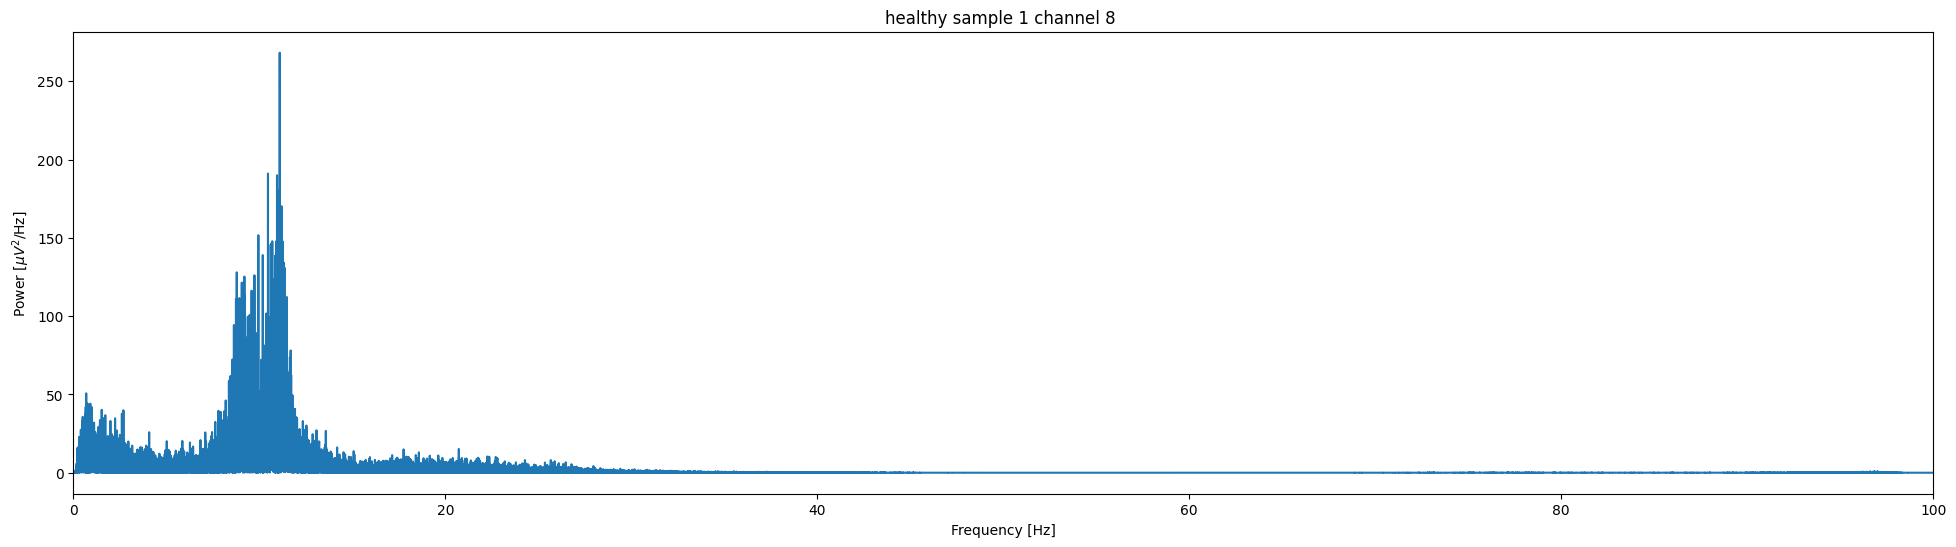

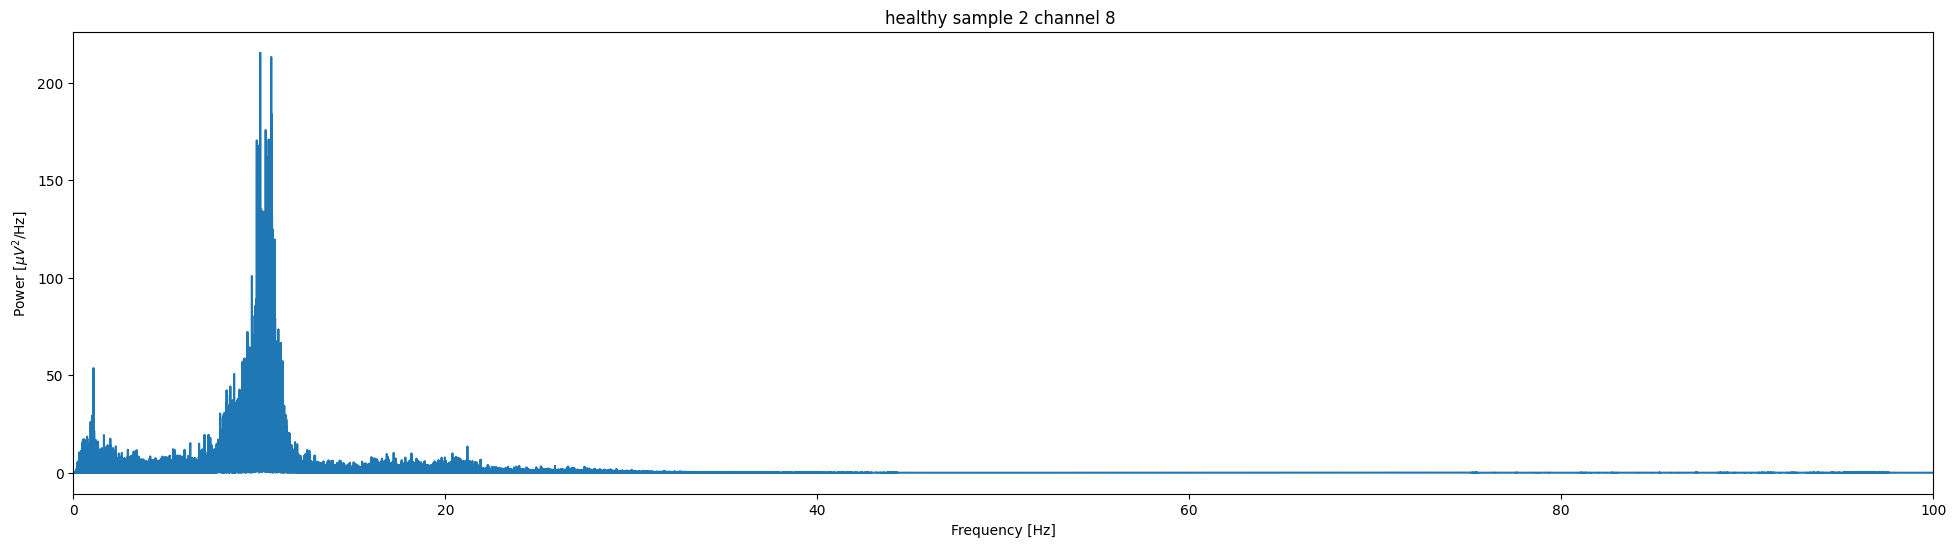

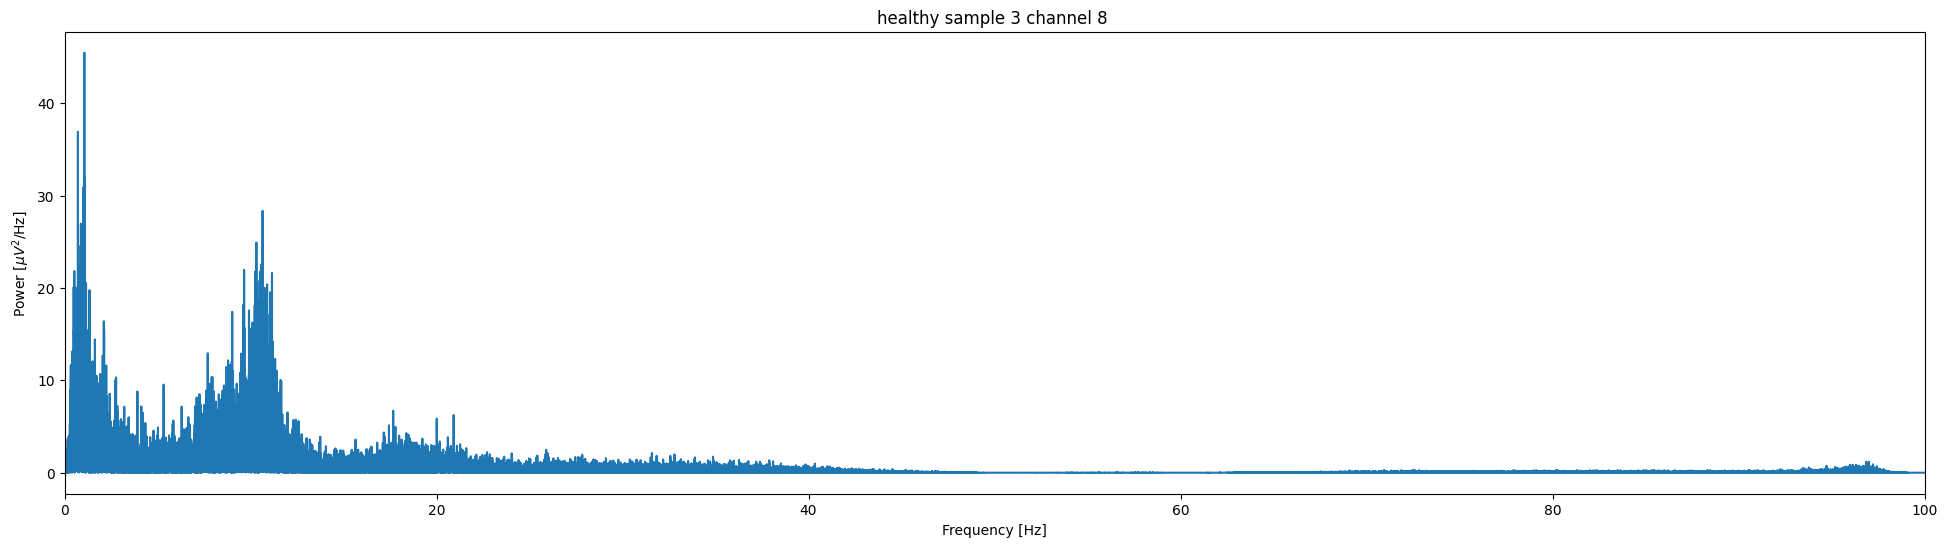

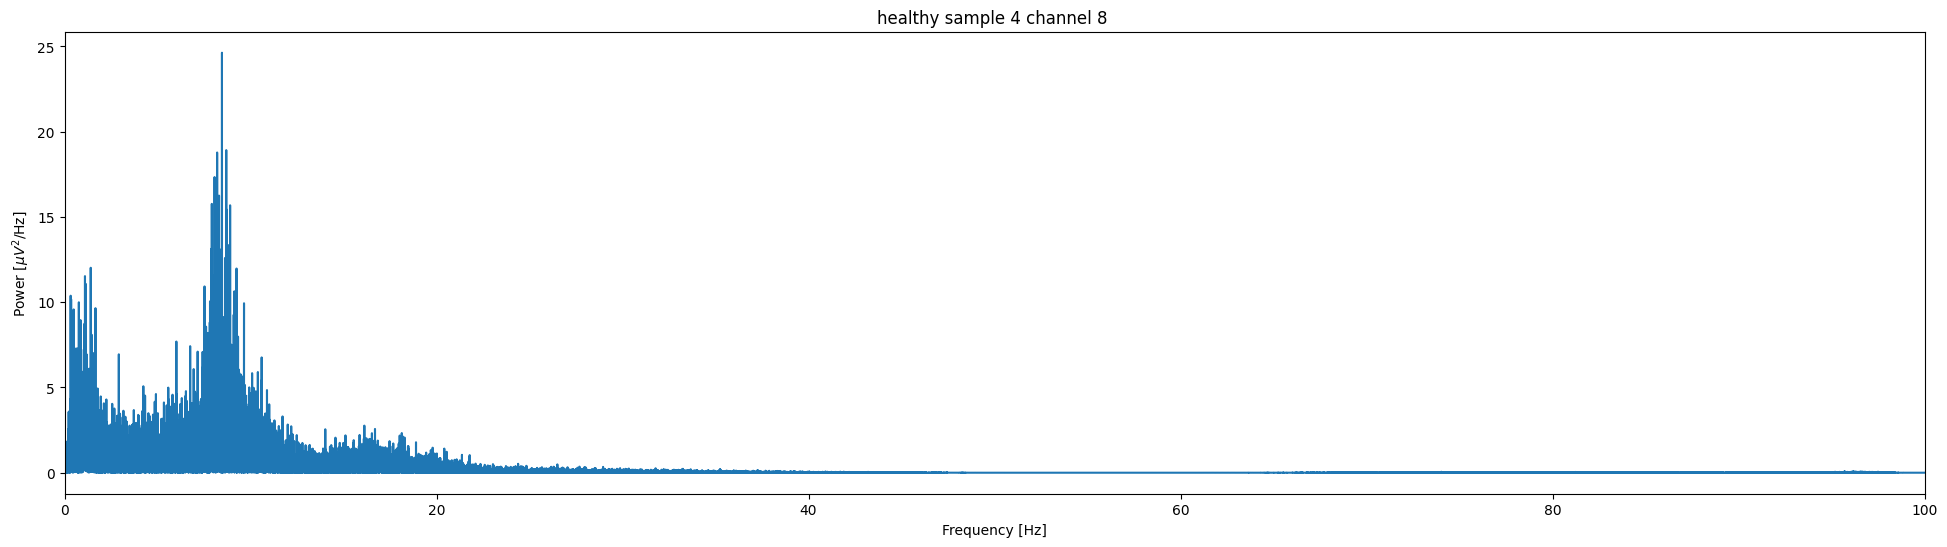

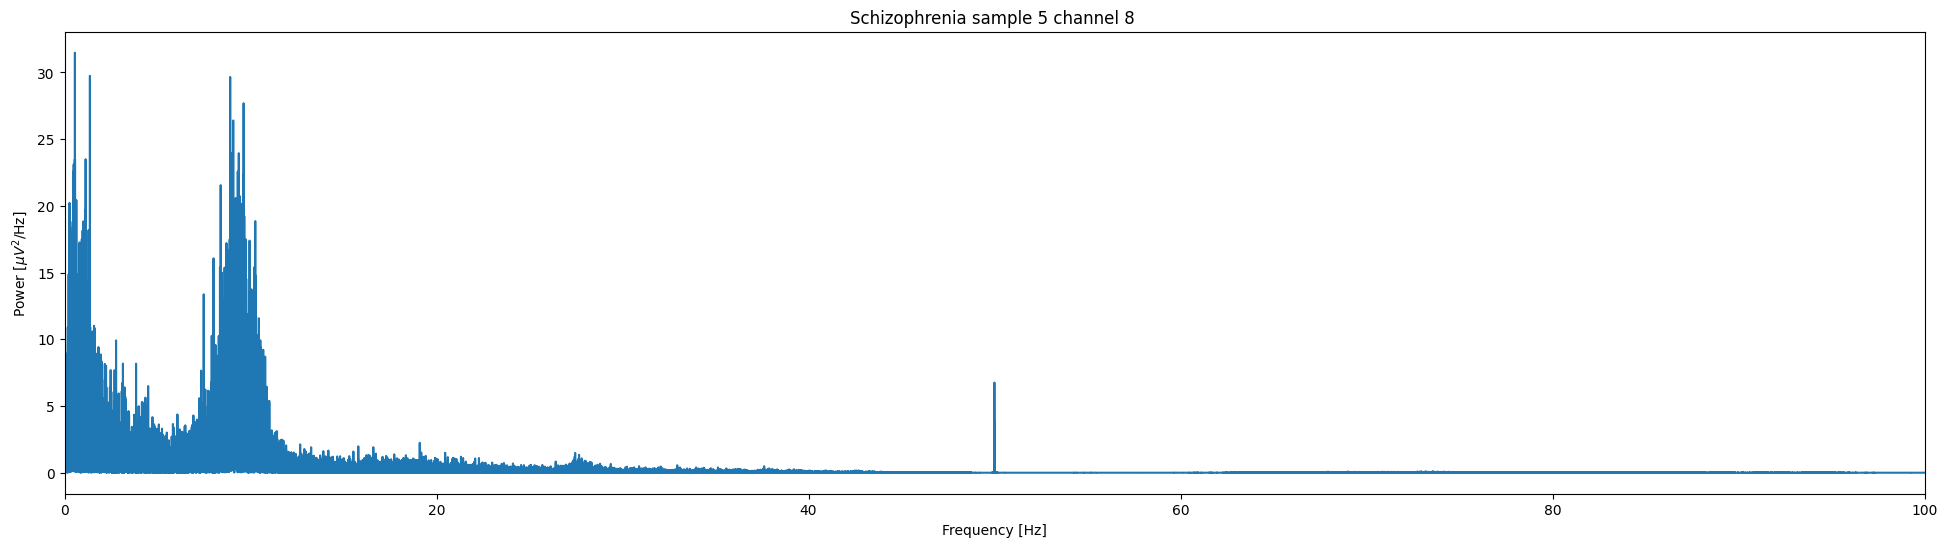

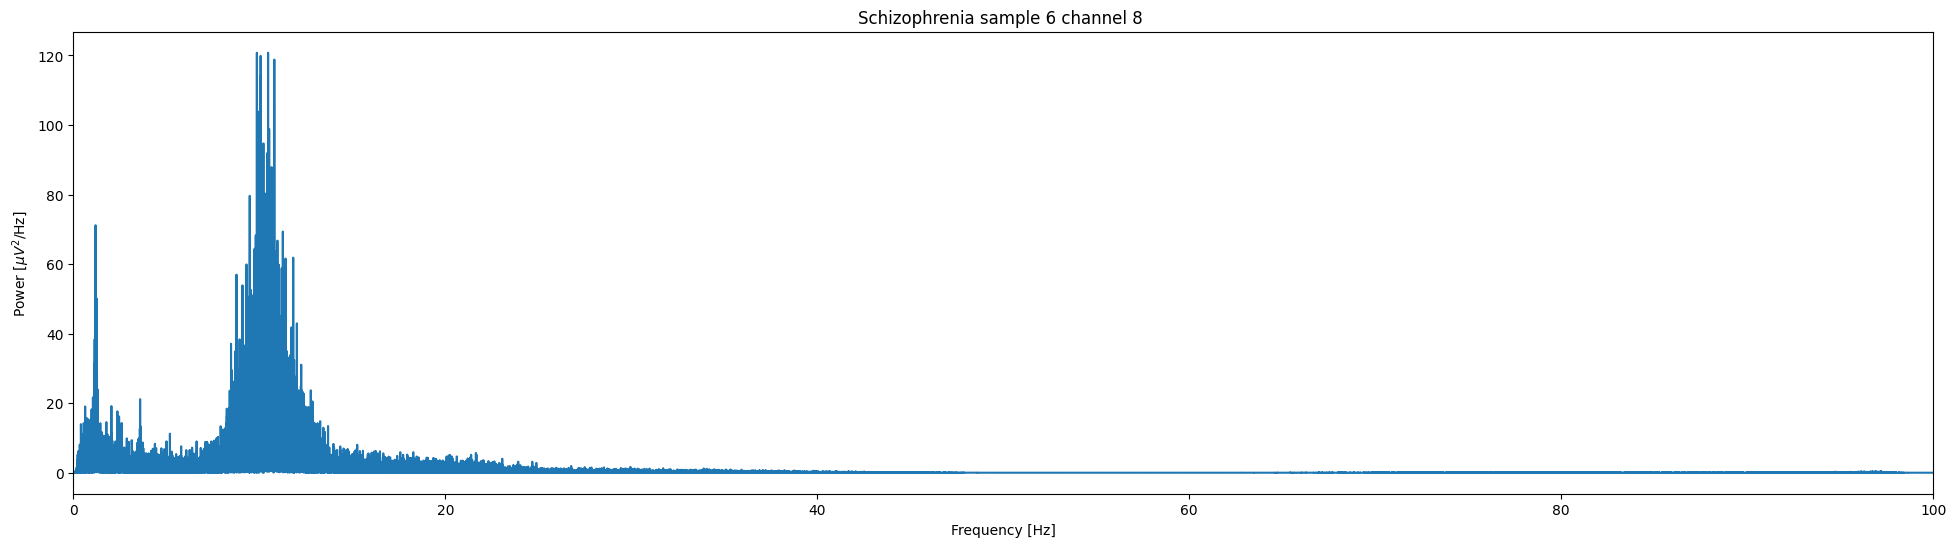

In [141]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot spectrum of whole range :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plot_spectrum(eeg_signals_np, 8)

In [142]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # plot PSD for selected range :
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# plt.figure(figsize=(24 , 6))

# # select half of data that is symmetrical :
# Sxx_pos = Sxx [: int(len(signal_freq)/2)]
# df = 1 / whole_time
# faxis = np.arange(len(Sxx_pos)) * df


# plt.plot(faxis,-10 * np.log10(Sxx_pos / max(Sxx_pos)))
# plt.title("PSD")
# plt.xlim([0, len(signal_freq)/2])
# plt.grid(True)
# plt.xlim([10,15])
# plt.xlabel('frequency')
# plt.ylabel('Power [$\mu V^2$/Hz]')
# # save fig :
# plt.savefig(f"./Plots/PSD_of_{1}_channel_range_of_{2} to {3}.png")

/tmp/ipykernel_6528/4207994400.py:88: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, freqs, 10 * np.log10(Sxx), cmap="jet")


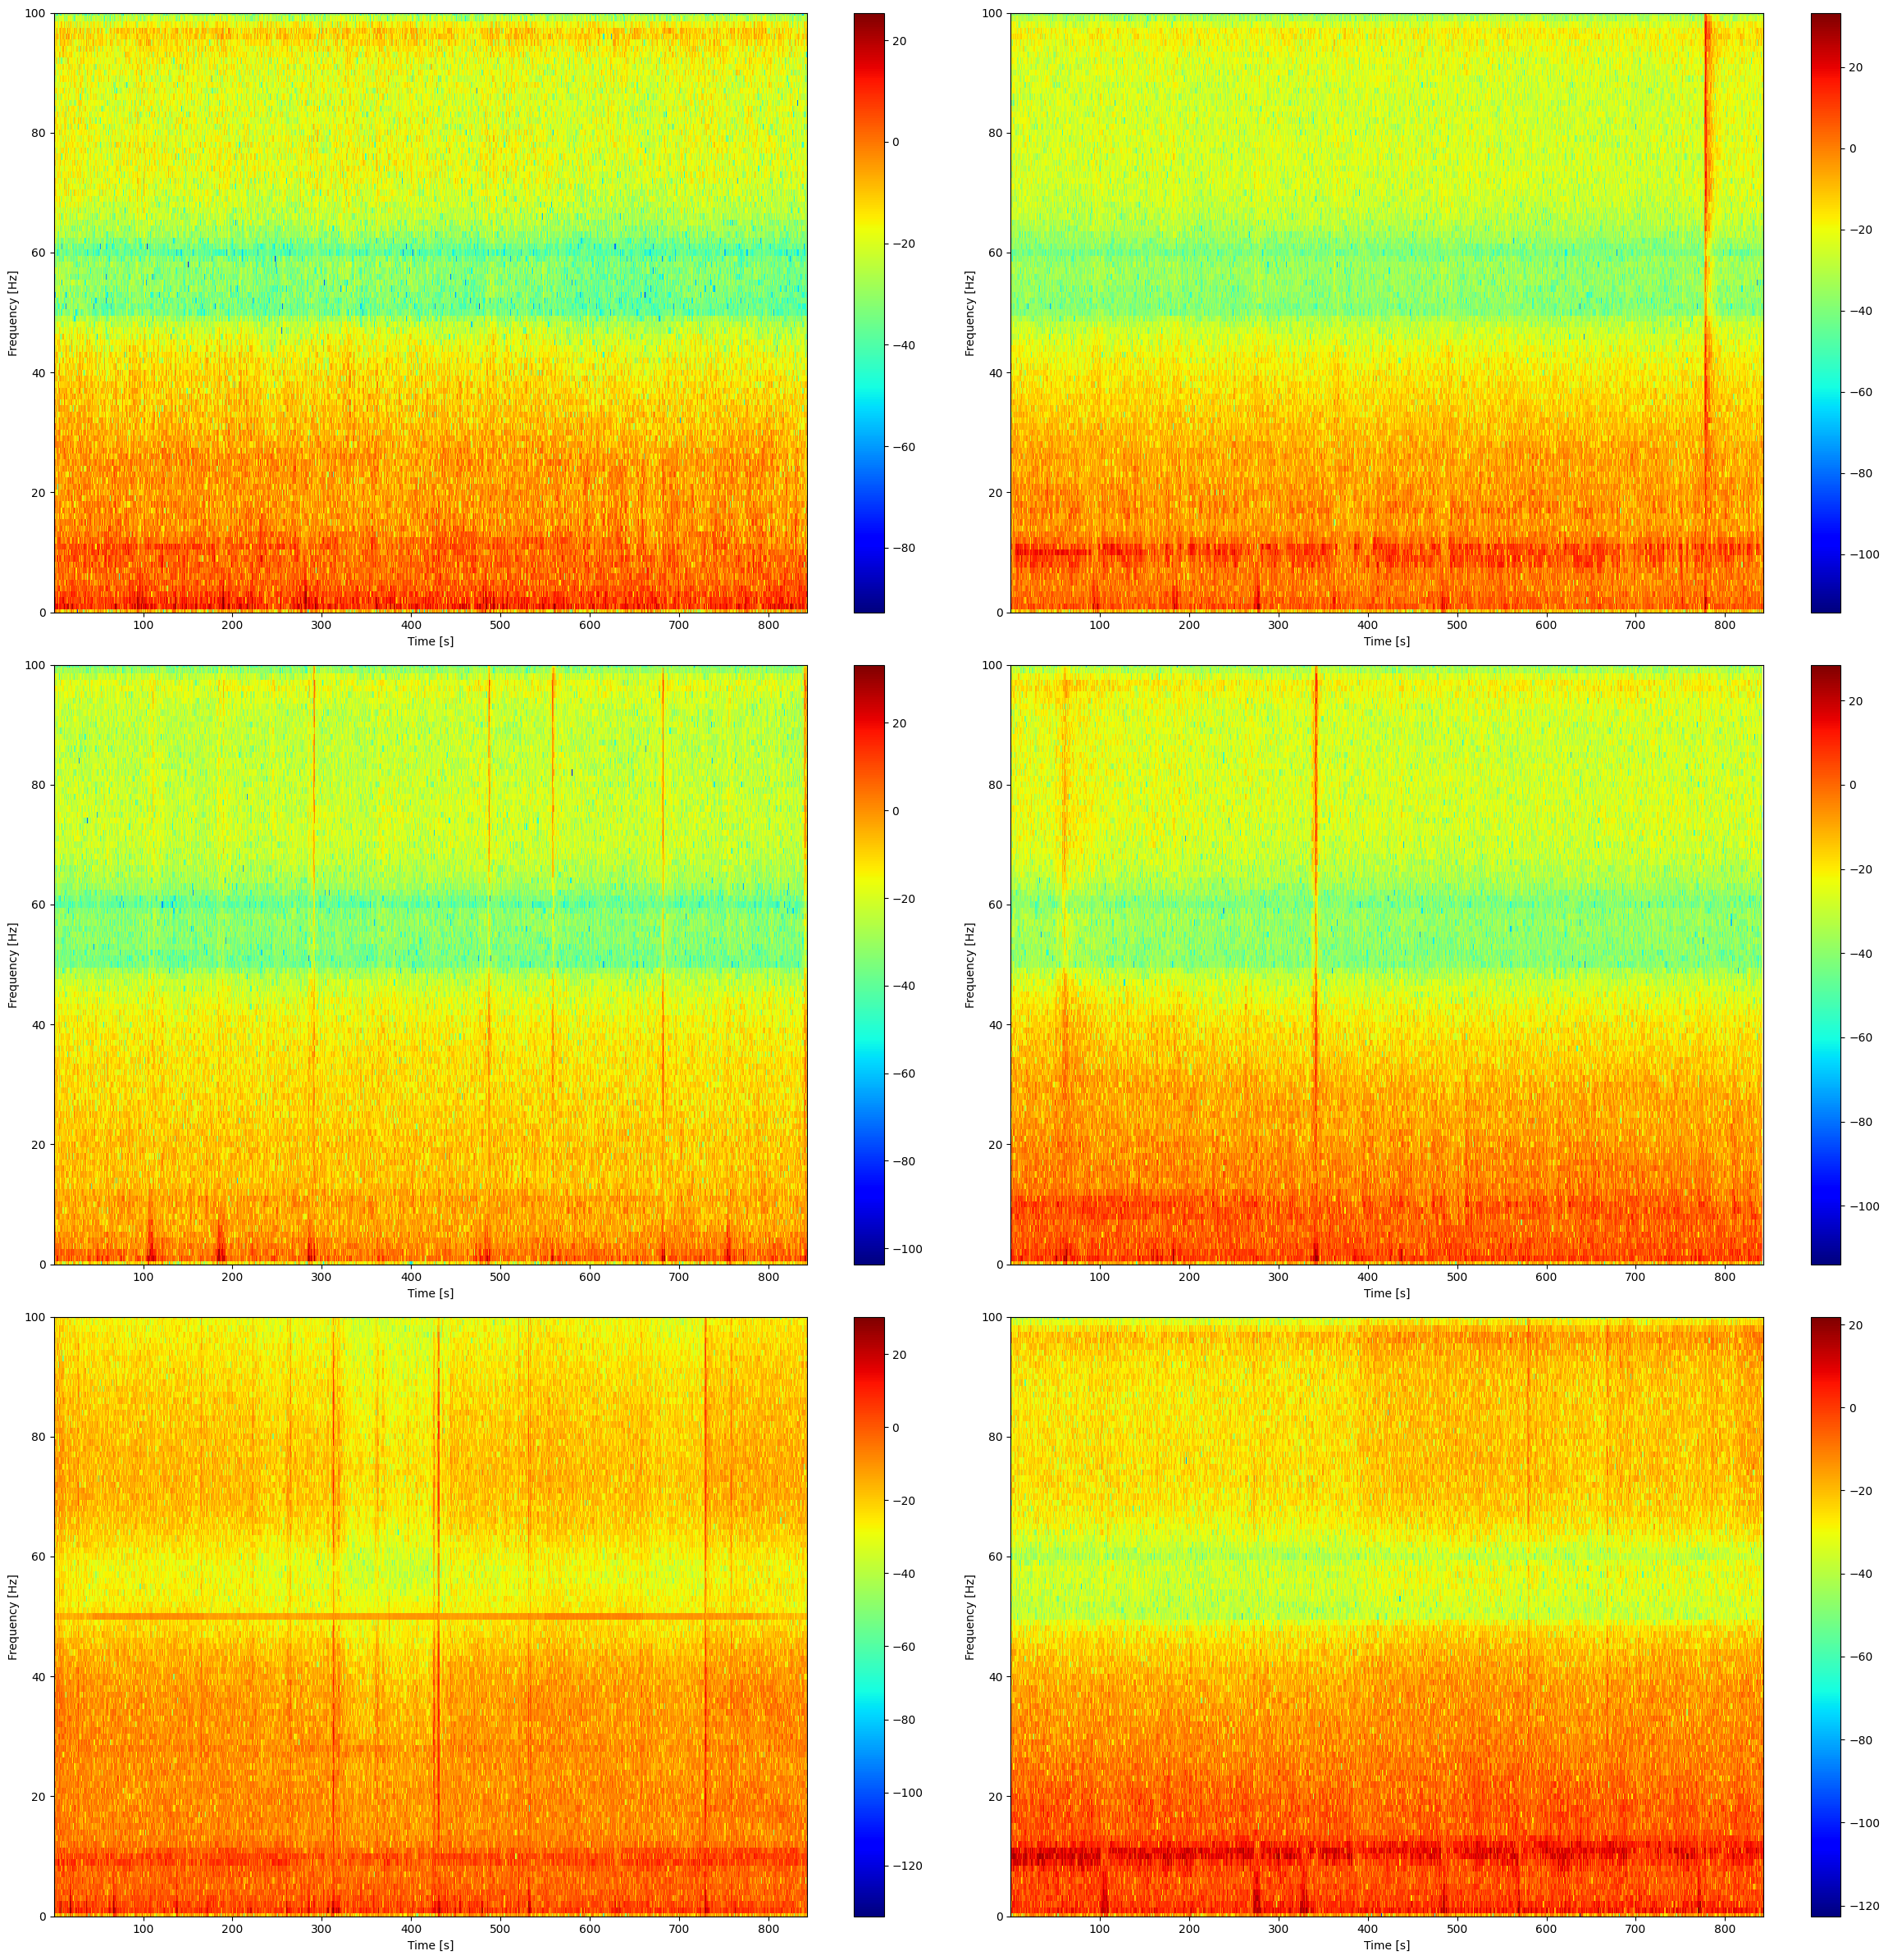

In [143]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot spectrograms for nfft = 500
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plot_spectrograms(eeg_signals, 1, 2, 250)

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
plot band frequency
</h1>

(6, 2000)


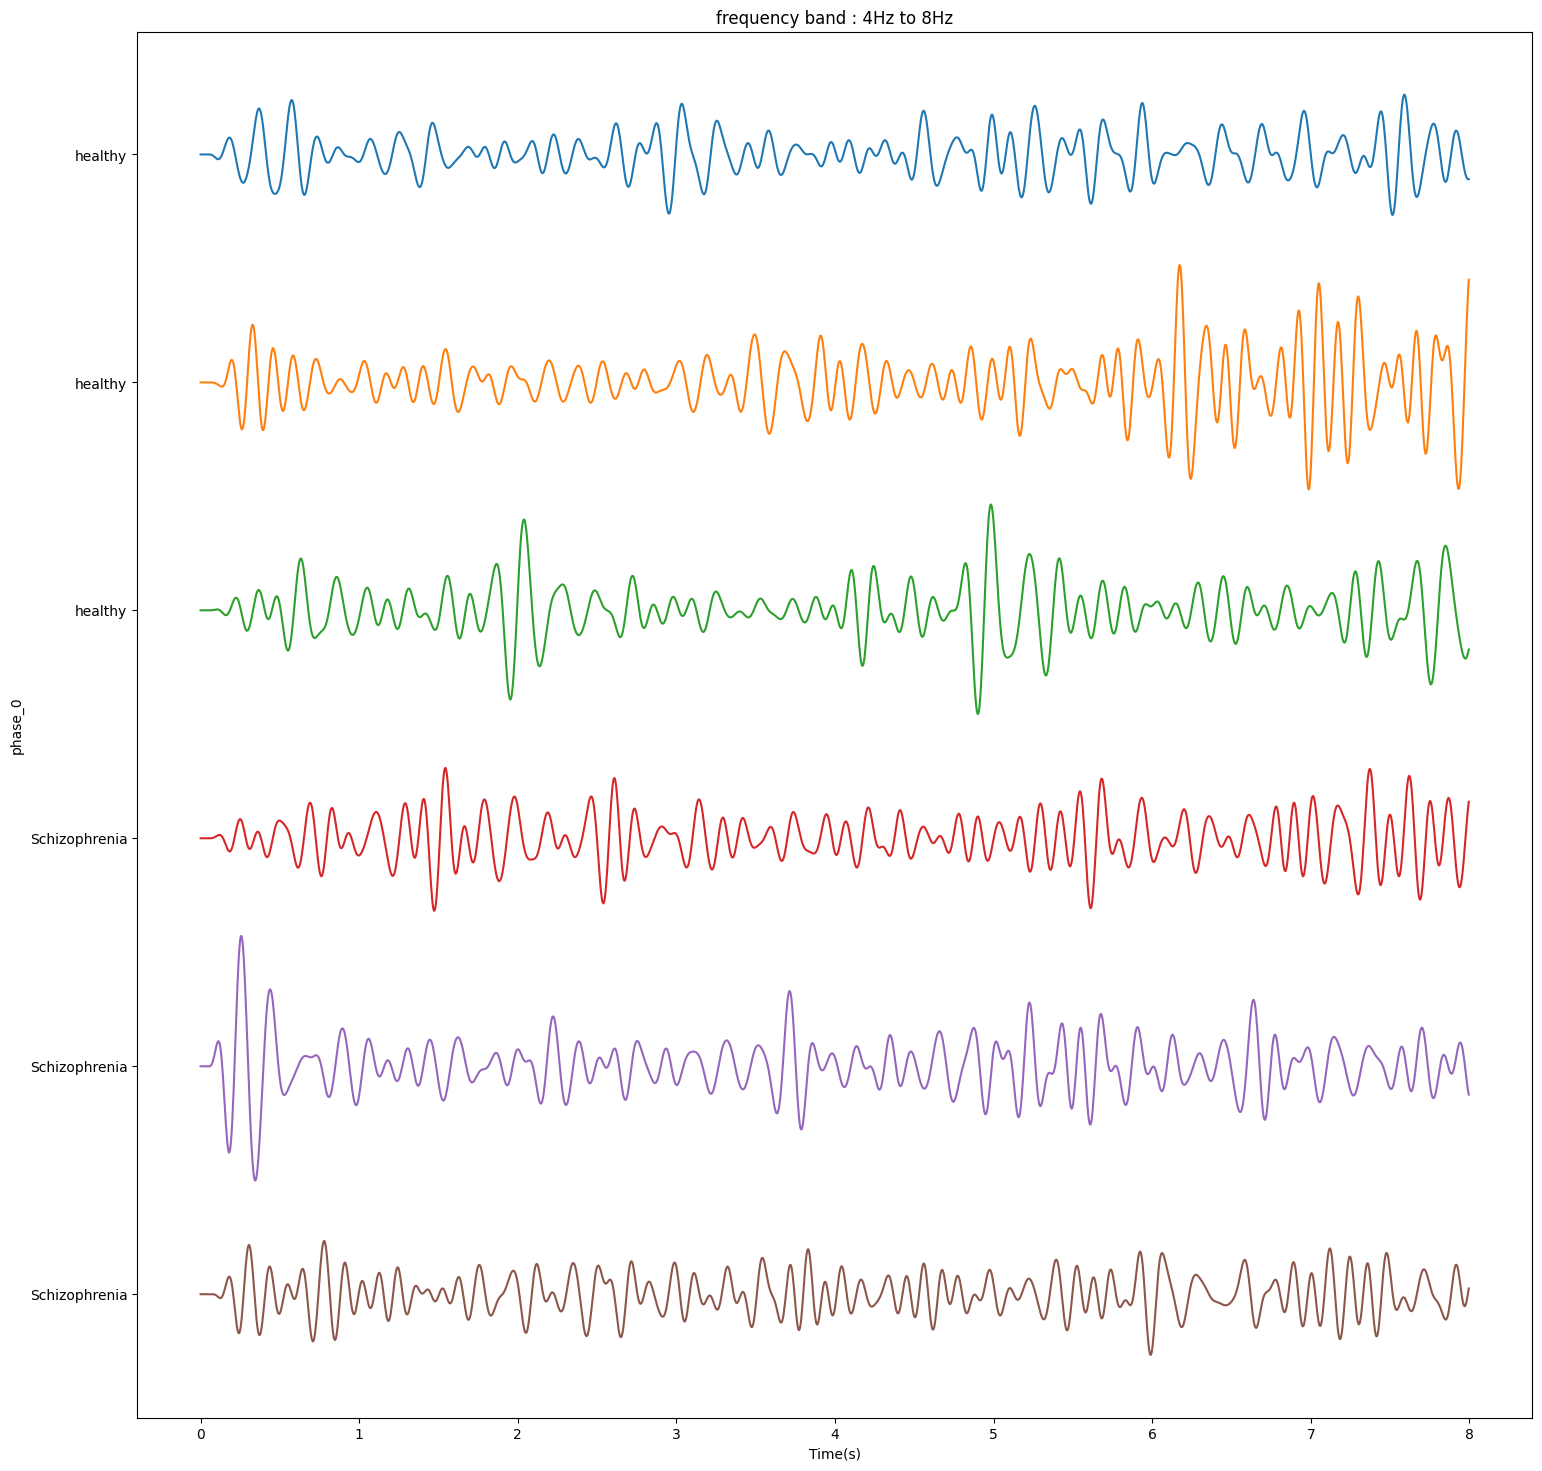

In [144]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# filter data and plot wanted frequency 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# filter_data_and_plot :
#       1 - signal
#       2 - channel
#       3 - low-cut frequency
#       4 - high-sut frequency
#       5 - time direction for input eeg signal
filter_data_and_plot(
    eeg_signals_np[:, :, 0:2000], 0, 4, 8, time_direction=np.arange(0, 8, delta_t)
)

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Dataset segmantation
</h1>

In [145]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # data segmentation to 2 sec
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

signals_segmented = segment_data(eeg_signals_np, 2, 250)

signals_segmented_np = np.array(signals_segmented)
print(np.shape(signals_segmented_np))

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
feature extraction</h1>

In [147]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # extract mean : 
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

num_samples, num_channels, segment_number, slide = np.shape(signals_segmented_np)

print(num_samples)
mean_feature = extract_mean(signals_segmented_np)
print(np.shape(mean_feature))
mean_feature = mean_feature.reshape(num_samples * segment_number, num_channels)
mean_feature = pd.DataFrame(mean_feature)
print(mean_feature.shape)
mean_feature.head()

6
(6, 19, 422)
(2532, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.784151,-0.540619,-0.496277,0.176812,2.460297,-3.474869,0.006476,3.570388,-3.073034,-0.889854,1.911979,-0.434809,0.856016,-3.347957,1.969472,-1.048570,3.945006,-3.111566,0.822377
1,1.277117,-3.532055,2.733691,-2.631444,1.038891,2.819930,-1.548875,-0.816460,3.945006,-5.818293,2.641031,-1.369671,3.215954,-2.105144,0.527882,-2.995970,3.251428,0.902805,-3.348263
2,5.096993,-6.369057,5.060296,-2.421964,-1.703921,1.837667,0.674365,-2.336337,15.738885,-14.637249,0.430329,1.616261,5.250510,-2.954685,-3.629914,-0.603004,0.821766,-0.798417,1.209533
3,-0.321965,1.240726,1.121766,-3.497193,1.236750,-0.341537,-0.699640,0.790267,1.058157,-0.166613,4.753568,-12.769666,7.519622,1.413509,0.768555,-1.694747,-1.868447,-5.783124,5.082314
4,-0.512179,3.925128,-3.587407,-0.961720,6.405555,-8.480677,7.672527,-5.361718,5.342559,1.601276,-0.525023,-2.652545,-3.251015,0.722377,1.291796,-1.813096,-0.477316,2.062744,-1.100863


In [148]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # extract sd : 
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

num_samples, num_channels, segment_number, slide = np.shape(signals_segmented_np)

sd_feature = extract_sd(signals_segmented_np)
print(np.shape(sd_feature))
sd_feature = sd_feature.reshape(num_samples * segment_number, num_channels)
sd_feature = pd.DataFrame(sd_feature)
print(sd_feature.shape)
sd_feature.head()

(6, 19, 422)
(2532, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,10.419351,8.410182,6.771252,8.671806,7.327192,8.751640,7.410095,6.874528,7.397456,7.544887,8.103369,9.210212,6.299119,8.893345,7.559351,7.011280,6.878803,9.105682,8.446177
1,7.368465,8.392091,7.841549,9.762208,6.405854,9.205581,7.658042,6.951992,7.827299,8.266096,9.109834,9.674975,11.233864,14.970496,9.606354,12.830785,10.157278,10.710394,10.155690
2,10.295729,6.821984,10.683310,12.036471,9.358167,8.723891,10.455678,6.974057,28.106724,46.079016,15.965063,32.344136,52.553087,14.769028,7.027784,11.859559,8.836141,7.571021,10.092747
3,8.169066,7.707912,11.343786,11.035255,7.912646,8.320337,8.780379,7.544174,8.610532,7.918925,14.721074,16.393091,10.109714,12.893833,13.045679,11.319329,18.050499,17.934493,16.343575
4,17.677450,14.226462,7.192007,10.658964,8.814941,9.546534,11.745809,11.165936,10.570762,11.031331,19.530081,8.145926,7.653816,10.458629,9.912812,8.040045,45.832304,23.761450,49.372688


In [149]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # extract power features : 
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

num_samples, num_channels, segment_number, slide = np.shape(signals_segmented_np)

power_features = extract_freq_power(signals_segmented_np, 250)
print(np.shape(power_features))

power_features = power_features.reshape(num_samples * segment_number, num_channels , np.shape(power_features)[3])
print(np.shape(power_features))

power_features = power_features.reshape(np.shape(power_features)[0], num_channels*np.shape(power_features)[2])
print(np.shape(power_features))

power_features = pd.DataFrame(power_features)
power_features.head()

(6, 19, 422, 4)
(2532, 19, 4)
(2532, 76)


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1.011845e+06,1.300725e+06,7.052236e+05,2.729444e+07,8.627621e+05,9.732792e+05,1.115201e+06,1.775586e+07,1.730493e+06,7.487313e+05,...,1.168736e+06,1.572025e+07,3.183323e+06,1.376203e+06,1.557945e+06,2.314882e+07,9.395512e+05,1.508600e+06,1.384511e+06,1.800355e+07
1,1.262553e+06,1.138582e+06,5.760102e+05,1.398133e+07,1.105064e+06,1.692190e+06,1.229695e+06,2.072565e+07,1.629288e+06,7.955135e+05,...,5.435090e+05,2.843552e+07,2.588199e+06,2.451766e+06,1.216148e+06,2.888190e+07,1.074091e+06,2.186973e+06,6.800493e+05,2.858723e+07
2,1.329856e+06,9.012965e+05,1.159371e+06,3.299535e+07,1.055920e+06,1.320363e+06,3.890022e+05,2.177609e+07,2.971492e+06,1.985331e+06,...,1.359002e+06,1.968817e+07,1.229854e+06,7.099262e+05,6.566376e+05,1.448946e+07,1.982641e+06,9.861681e+05,2.007855e+06,2.583163e+07
3,1.969094e+06,1.591500e+06,1.111928e+06,1.670933e+07,7.045941e+05,1.061636e+06,1.052042e+06,1.523783e+07,1.663433e+06,1.046001e+06,...,1.014450e+06,8.232790e+07,1.769570e+06,1.154477e+06,2.234212e+06,8.877264e+07,1.139343e+06,1.277119e+06,4.698615e+05,7.323559e+07
4,1.131219e+06,1.053729e+06,2.395776e+06,7.818864e+07,1.427537e+06,1.408595e+06,1.017919e+06,5.444971e+07,1.127329e+06,9.625330e+05,...,1.061242e+07,5.252070e+08,9.109721e+05,1.239271e+06,1.234260e+07,1.422154e+08,2.914470e+06,1.921754e+06,4.638790e+07,6.097185e+08


In [150]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # concat extracted features : 
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

mean_feature_np = np.array(mean_feature)
sd_feature_np = np.array(sd_feature)
power_features_np = np.array(power_features)

concated_features = np.concatenate((mean_feature_np, sd_feature_np, power_features_np), axis=1)

print(np.shape(concated_features))

concated_features_df = pd.DataFrame(concated_features)

concated_features_df.head(-1)

(2532, 114)


,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,0.784151,-0.540619,-0.496277,0.176812,2.460297,-3.474869,0.006476,3.570388,-3.073034,-0.889854,...,1.168736e+06,1.572025e+07,3.183323e+06,1.376203e+06,1.557945e+06,2.314882e+07,9.395512e+05,1.508600e+06,1.384511e+06,1.800355e+07
1,1.277117,-3.532055,2.733691,-2.631444,1.038891,2.819930,-1.548875,-0.816460,3.945006,-5.818293,...,5.435090e+05,2.843552e+07,2.588199e+06,2.451766e+06,1.216148e+06,2.888190e+07,1.074091e+06,2.186973e+06,6.800493e+05,2.858723e+07
2,5.096993,-6.369057,5.060296,-2.421964,-1.703921,1.837667,0.674365,-2.336337,15.738885,-14.637249,...,1.359002e+06,1.968817e+07,1.229854e+06,7.099262e+05,6.566376e+05,1.448946e+07,1.982641e+06,9.861681e+05,2.007855e+06,2.583163e+07
3,-0.321965,1.240726,1.121766,-3.497193,1.236750,-0.341537,-0.699640,0.790267,1.058157,-0.166613,...,1.014450e+06,8.232790e+07,1.769570e+06,1.154477e+06,2.234212e+06,8.877264e+07,1.139343e+06,1.277119e+06,4.698615e+05,7.323559e+07
4,-0.512179,3.925128,-3.587407,-0.961720,6.405555,-8.480677,7.672527,-5.361718,5.342559,1.601276,...,1.061242e+07,5.252070e+08,9.109721e+05,1.239271e+06,1.234260e+07,1.422154e+08,2.914470e+06,1.921754e+06,4.638790e+07,6.097185e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,-0.447653,-0.258968,0.299136,-0.378845,-0.106368,0.300971,0.180787,-0.288326,0.269167,-0.132057,...,2.797896e+05,6.509166e+06,3.417586e+06,5.631006e+05,4.532014e+05,9.648072e+06,3.388944e+06,9.994039e+05,3.379874e+05,9.940591e+06
2527,-0.271200,0.376200,-0.169671,-0.289549,0.200053,0.388738,-0.488020,-0.150711,0.316873,-0.172729,...,6.160598e+05,2.620151e+07,7.813874e+06,1.795682e+06,7.633220e+05,2.076168e+07,1.099961e+06,4.535894e+05,2.337623e+05,5.278008e+06
2528,-0.095053,-0.319518,0.277423,-0.262026,0.419625,-0.445512,0.277423,0.130635,-0.050711,-0.258356,...,2.061749e+05,7.446489e+06,3.147594e+06,1.100827e+06,5.566437e+05,9.878600e+06,1.745118e+06,5.842261e+05,8.043689e+05,7.465283e+06
2529,0.189044,-0.012791,0.176506,0.296078,-0.275482,0.109534,-0.066307,-0.258356,0.019014,0.085986,...,6.482309e+05,3.507884e+07,1.311023e+07,1.647249e+06,7.422794e+05,3.177008e+07,4.451570e+06,9.795992e+05,5.912845e+05,1.387006e+07


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Statistics tests</h1>

In [151]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # split dataset to 2 groups (A = healthy , B = patient)
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

group_a = concated_features[:int(np.shape(concated_features)[0]/2), :]
group_b = concated_features[int(np.shape(concated_features)[0]/2):, :]

print(np.shape(group_a))
print(np.shape(group_b))

(1266, 114)
(1266, 114)


In [152]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # statistics test (t-test , p-value)
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# Independent two-sample t-test

# feature_1 = mean 
# feature_2 = sd
# feature_3 = alpha power 
# feature_4 = beta power 
# feature_5 = theta power 
# feature_6 = total power

for i in range(6):
    t_stat, p_value = stats.ttest_ind(group_a[:,19*i], group_b[:,19*i], equal_var=False)
    print(f"t_stat feature {i+1} : " , t_stat, f" p-value feature {i+1} : ", p_value)

    


t_stat feature 1 :  -0.9586771646207676  p-value feature 1 :  0.3378149853974842
t_stat feature 2 :  4.831880554819757  p-value feature 2 :  1.4433187293501752e-06
t_stat feature 3 :  4.1910466718704855  p-value feature 3 :  2.88736307325896e-05
t_stat feature 4 :  -0.8911353294065804  p-value feature 4 :  0.37302588455206875
t_stat feature 5 :  3.394240626143266  p-value feature 5 :  0.0007023540896129399
t_stat feature 6 :  9.746420429959151  p-value feature 6 :  6.41331548314879e-22


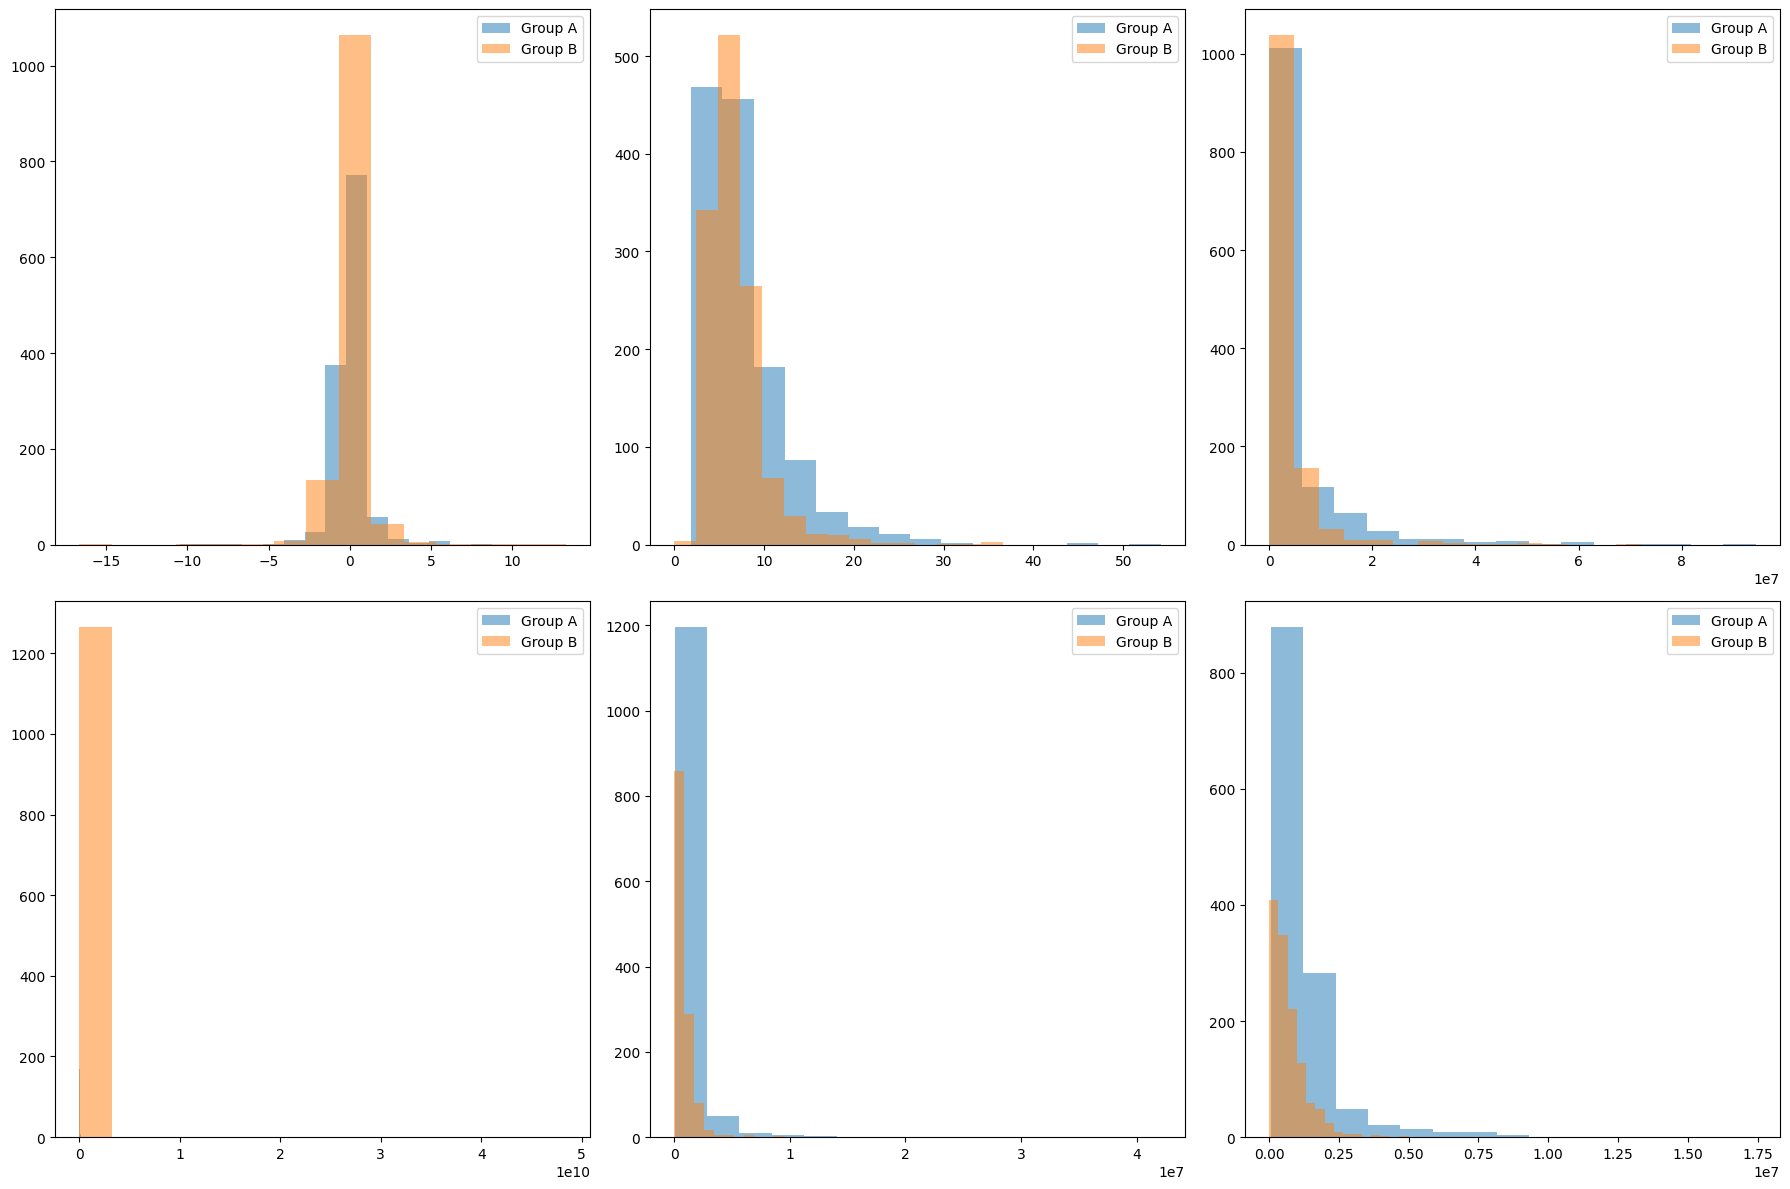

In [153]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # plot features distribution
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

number_of_subplot = 6
plt.figure(figsize=(18 , 12))
num_rows = 2
num_cols = 3

plot_num = 0
while plot_num <= int(number_of_subplot) + 1:
    if(plot_num == 6) : 
        break
    plt.subplot(num_rows , num_cols, int(plot_num + 1))
    plt.hist(group_a[:,(19*plot_num)], alpha=0.5, label='Group A', bins=15)
    plt.hist(group_b[:,(19*plot_num)], alpha=0.5, label='Group B', bins=15)
    plt.legend(loc='best')
    plot_num = plot_num + 1
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


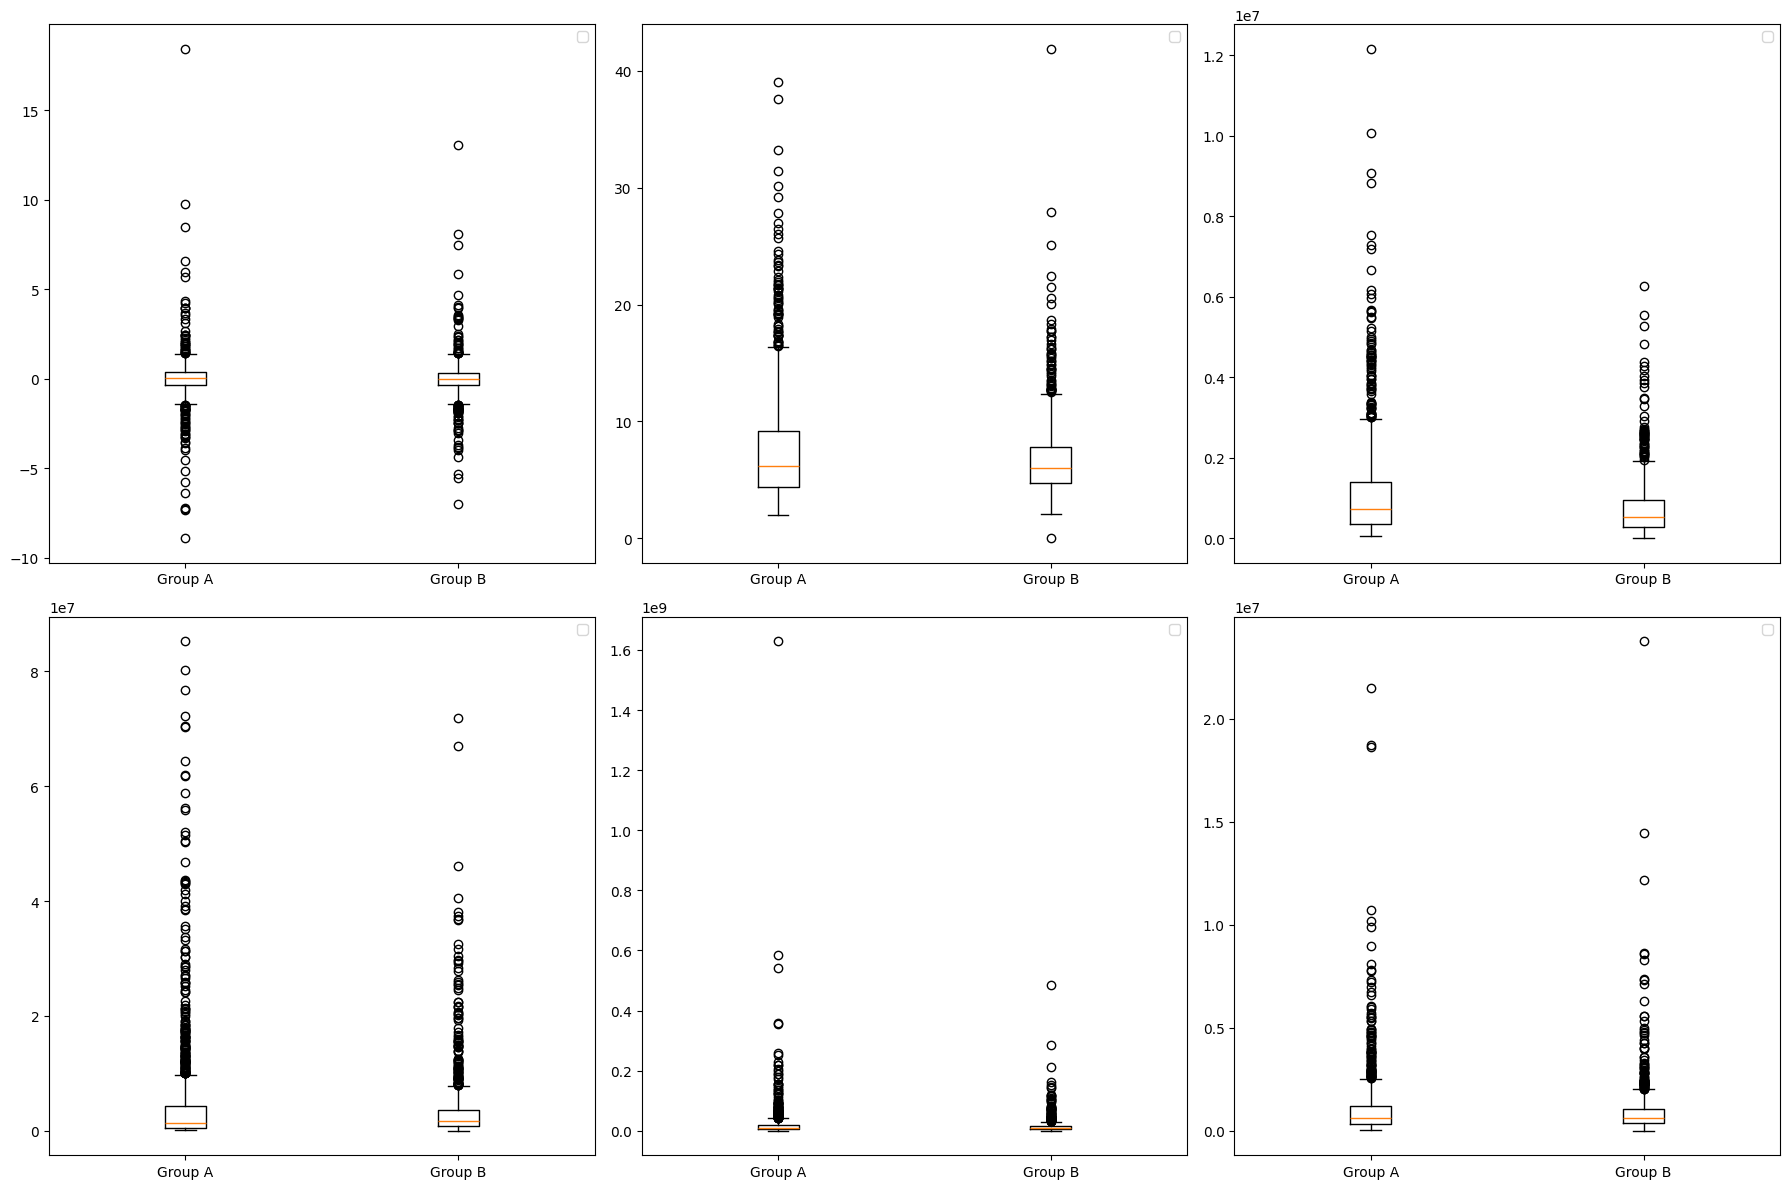

In [154]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # plot features distribution
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

number_of_subplot = 6
plt.figure(figsize=(18 , 12))
num_rows = 2
num_cols = 3

plot_num = 0
while plot_num <= int(number_of_subplot) + 1:
    if(plot_num == 6) : 
        break
    plt.subplot(num_rows , num_cols, int(plot_num + 1))
    plt.boxplot([group_a[:,(19*plot_num)+ 1], group_b[:,(19*plot_num)+1]], labels=['Group A', 'Group B'])
    plt.legend(loc='best')
    plot_num = plot_num + 1
plt.tight_layout()
plt.show()

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
create train and test datasets</h1>

In [155]:
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # create target column :
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

group_a_target = np.zeros(int(np.shape(concated_features)[0]/2))
group_b_target = np.ones(int(np.shape(concated_features)[0]/2))

group_a_target = np.transpose(group_a_target)
group_b_target = np.transpose(group_b_target)

print(np.shape(group_a_target))
print(np.shape(group_b_target))


# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# 1 - normalize data : 
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,10))
normalized_data = scaler.fit_transform(concated_features)

# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# # split data to train and test datasets : 
# # ██████████████████████████████████████████████████████████████████████████████████████████████████████████████



# concat healthy and patient y data : 
y_data = np.concatenate((group_a_target, group_b_target), axis=0)
print(np.shape(y_data))
print(y_data)

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(normalized_data, y_data, test_size=0.2, random_state=42)

# Display the shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
pd.DataFrame(normalized_data).head()


(1266,)
(1266,)
(2532,)
[0. 0. 0. ... 1. 1. 1.]
X_train shape: (2025, 114)
X_val shape: (507, 114)
y_train shape: (2025,)
y_val shape: (507,)


,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,6.245139,3.754210,4.907550,9.316590,1.976107,3.828170,5.789016,6.777963,4.149720,5.913090,...,1.207750,1.075909,1.221737,1.676096,1.364951,1.158460,1.092267,2.515054,1.268617,1.176496
1,6.393366,2.769103,6.016046,9.102969,1.888865,4.851908,5.411181,5.859121,6.332246,4.217121,...,1.096612,1.137308,1.180283,2.204495,1.284885,1.197704,1.105479,3.196330,1.131941,1.280251
2,7.541945,1.834853,6.814516,9.118904,1.720518,4.692161,5.951264,5.540777,10.000000,1.182351,...,1.241571,1.095069,1.085666,1.348770,1.153818,1.099184,1.194702,1.990387,1.389556,1.253237
3,5.912546,4.340823,5.462847,9.037112,1.901009,4.337752,5.617482,6.195656,5.434471,6.161971,...,1.180325,1.397540,1.123261,1.567167,1.523368,1.607672,1.111887,2.282583,1.091161,1.717956
4,5.855352,5.224821,3.846701,9.229983,2.218257,3.014064,7.651300,4.907099,6.766868,6.770335,...,2.886422,3.536090,1.063455,1.608825,3.891275,1.973502,1.286211,2.929976,10.000000,6.977299


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Train SVM model
</h1>

In [156]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# create SVM model for classification 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
svm_classifier = SVC()

In [157]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# fit model and calculate accuracy with test data
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
svm_classifier.fit(X_train, y_train)

SVC()

In [158]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for train data (method 1)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
train_predict = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predict)
print(train_accuracy)

0.6419753086419753


In [159]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for validation data (method 1)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
svm_predictions = svm_classifier.predict(X_val)
svm_accuracy = accuracy_score(y_val, svm_predictions)
print(svm_accuracy)

0.5976331360946746


In [160]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for Train data (method 2)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

cross_val_score(svm_classifier, X_train, y_train, cv=3 , scoring="accuracy")

array([0.61481481, 0.6237037 , 0.60148148])

2025
2025


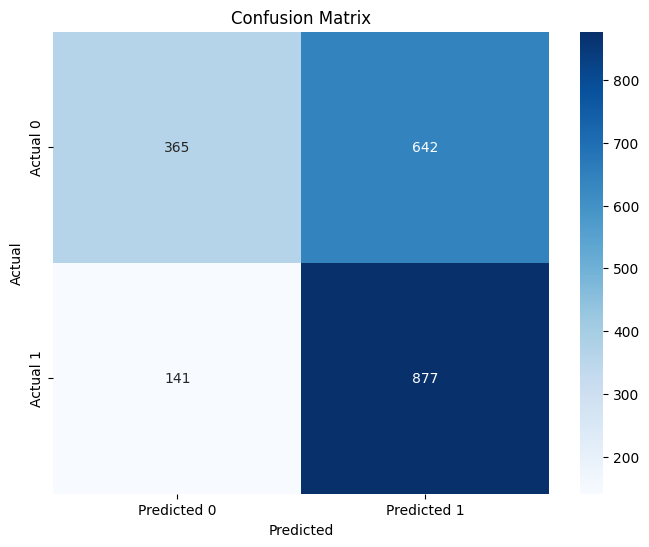

In [161]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for train data (method 3)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

y_train_pred = cross_val_predict(svm_classifier, X_train, y_train, cv=3)
y_train_pred = np.array(y_train_pred)
print(len(y_train_pred))
print(len(y_train))

# print confusion matrix
confusion_matrix(y_train, y_train_pred)

plot_confusion_matrix(y_train, y_train_pred)

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Train "Logistic Regression" Model
</h1>

In [162]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# create Logistic Regression model for classification 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
logreg_classifier = LogisticRegression()

In [163]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# fit model and calculate accuracy with test data
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
logreg_classifier.fit(X_train, y_train)


/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for train data (method 1)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
logreg_predictions = logreg_classifier.predict(X_train)
logreg_accuracy = accuracy_score(y_train, logreg_predictions)
print("Logistic Regression Accuracy for train data :", logreg_accuracy)

Logistic Regression Accuracy for train data : 0.6849382716049383


In [165]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for validation data (method 1)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
logreg_predictions = logreg_classifier.predict(X_val)
logreg_accuracy = accuracy_score(y_val, logreg_predictions)
print("Logistic Regression Accuracy for test data :", logreg_accuracy)

Logistic Regression Accuracy for test data : 0.6272189349112426


In [166]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for Train data (method 2)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
cross_val_score(logreg_classifier, X_train, y_train, cv=3 , scoring="accuracy")

/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

array([0.65037037, 0.67111111, 0.60888889])

/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

2025
2025


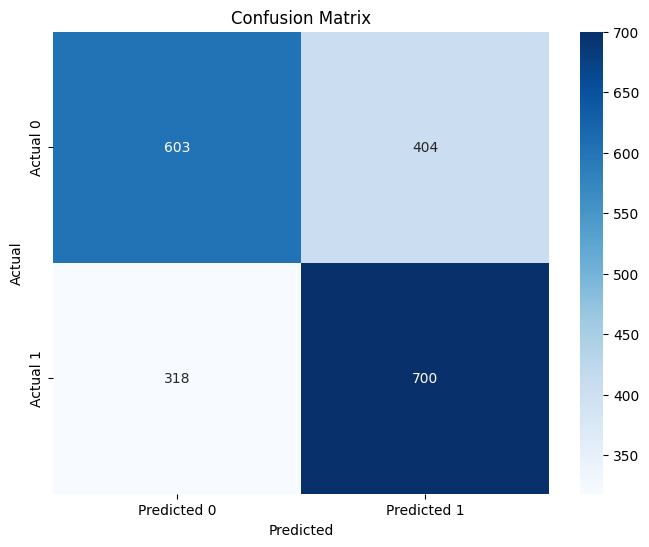

In [167]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for train data (method 3)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
y_train_pred = cross_val_predict(logreg_classifier, X_train, y_train, cv=3)
y_train_pred = np.array(y_train_pred)
print(len(y_train_pred))
print(len(y_train))

# print confusion matrix
confusion_matrix(y_train, y_train_pred)

plot_confusion_matrix(y_train, y_train_pred)

In [168]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate precision and recall and f1_score
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

0.6340579710144928
0.68762278978389
0.6597549481621113


[0.50271605 0.50247036 0.50271873 ... 0.5        0.         1.        ]
[1.00000000e+00 9.99017682e-01 9.99017682e-01 ... 9.82318271e-04
 0.00000000e+00 0.00000000e+00]
[-21.08052607 -16.45830124 -14.17884886 ...   3.25671801   3.66030241
   4.84380519]


/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alireza/anaconda3/envs/brainWave/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

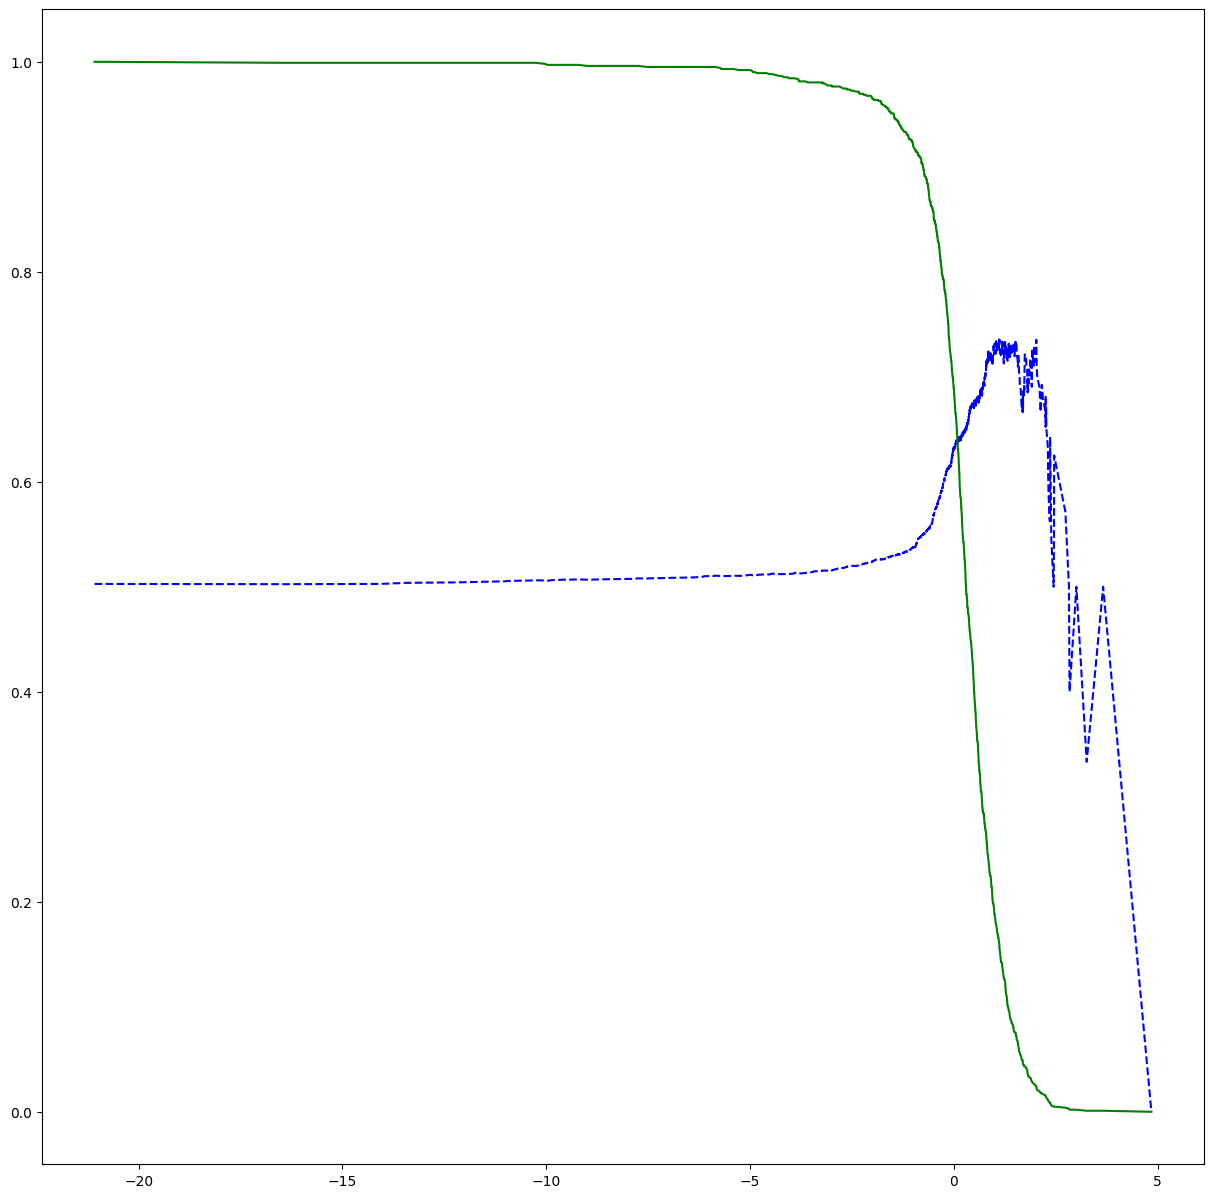

In [169]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate score for each prediction : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
y_scores = cross_val_predict(logreg_classifier, X_train, y_train, cv=3, method="decision_function")
precisions , recalls , thresholds = precision_recall_curve(y_train, y_scores) 
print(precisions)
print(recalls)
print(thresholds)

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot precision and recall chart : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 
plt.figure(figsize=(15, 15))   
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Train "KNN" Model
</h1>

In [170]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# k-Nearest Neighbors (KNN) model
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can specify the number of neighbors


In [171]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# fit random KNN model on the data : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [172]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for train data (method 1)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
knn_predictions = knn_classifier.predict(X_train)
knn_accuracy = accuracy_score(y_train, knn_predictions)
print("knn_classifier Accuracy for train data :", knn_accuracy)

knn_classifier Accuracy for train data : 0.808395061728395


In [173]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for validation data (method 1)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
knn_predictions = knn_classifier.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_predictions)
print("knn_classifier accuracy for test data:", knn_accuracy)

knn_classifier accuracy for test data: 0.6923076923076923


In [174]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for Train data (method 2)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can specify the number of neighbors
cross_val_score(knn_classifier, X_train, y_train, cv=3 , scoring="accuracy")

array([0.68296296, 0.66518519, 0.66814815])

2025
2025


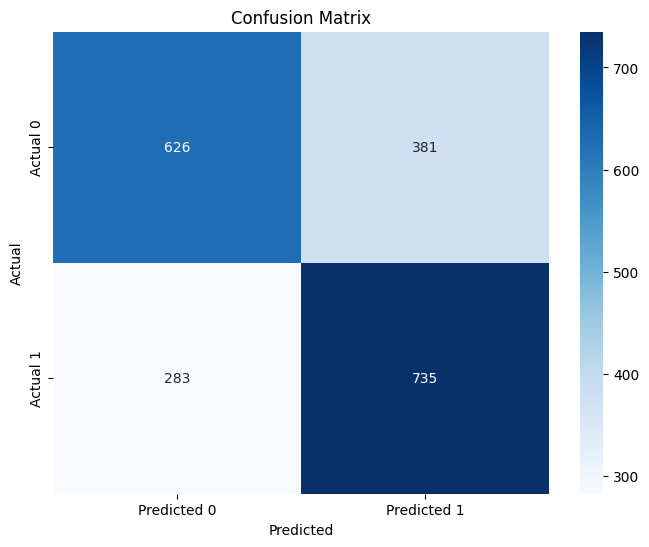

In [175]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for train data (method 3)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
y_train_pred = cross_val_predict(knn_classifier, X_train, y_train, cv=3)
print(len(y_train_pred))
print(len(y_train))

# print confusion matrix
confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(y_train, y_train_pred)

In [176]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate precision and recall and f1_score
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
print("precision_score : ",precision_score(y_train, y_train_pred).round(2))
print("recall_score : \t",recall_score(y_train, y_train_pred).round(2))
print("f1_score : \t",f1_score(y_train, y_train_pred).round(2))
print("AUC score : \t",roc_auc_score(y_train, y_train_pred).round(2))

precision_score :  0.66
recall_score : 	 0.72
f1_score : 	 0.69
AUC score : 	 0.67


In [177]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate score for each prediction : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
y_probs = cross_val_predict(knn_classifier, X_train, y_train, cv=3, method="predict_proba")
y_scores = y_probs[:, 1]

# calculate precisions and recalls  
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

# calculate FPR and TPR for KNN model
fpr , tpr , thresholds_ROC = roc_curve(y_train, y_scores)

print(y_scores)
# print(precisions)
# print(recalls)
# print(thresholds)


[0.2 0.2 0.6 ... 0.4 1.  0.8]


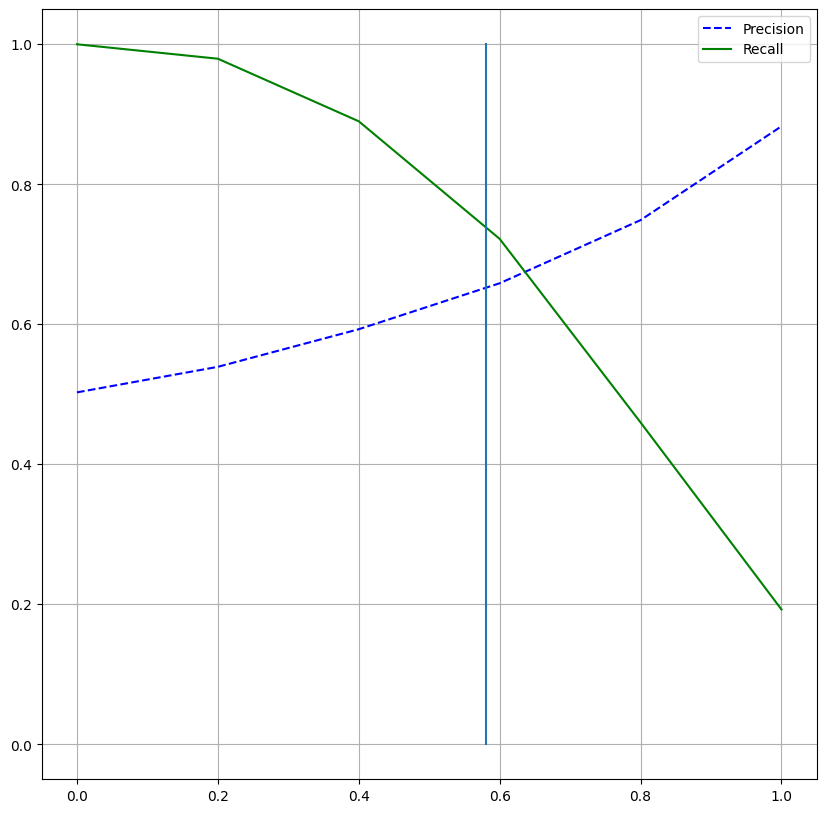

In [178]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot precision and recall chart : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 
plt.figure(figsize=(10, 10))   
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.grid(True)
plt.legend()
plt.plot([0.58,0.58],[0,1])
plt.show()

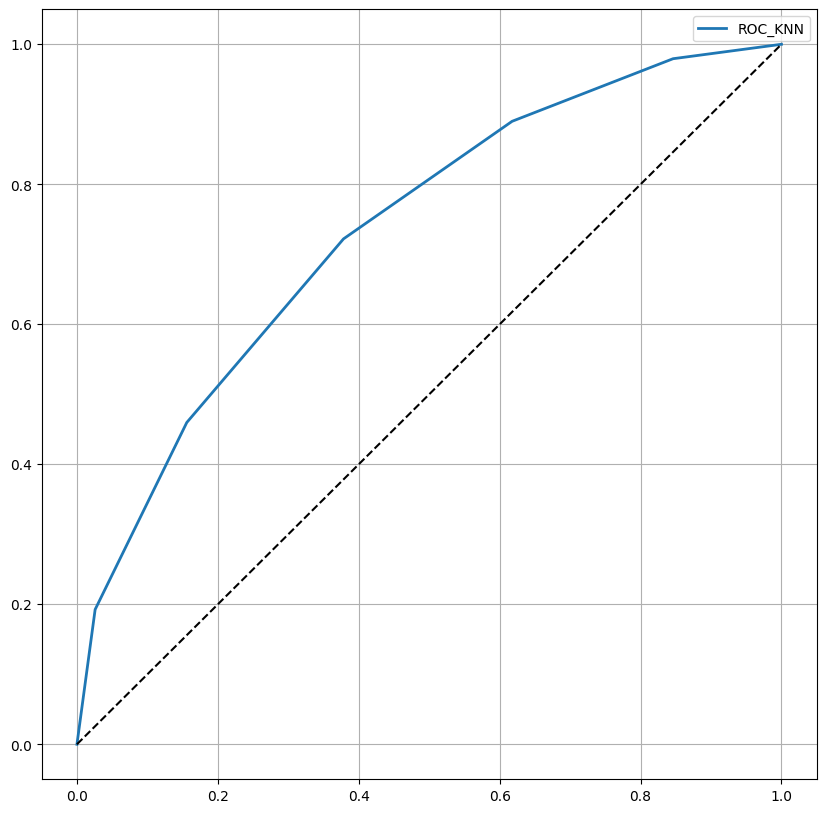

In [179]:
def plot_roc_curve(fpr , tpr , label=None) : 
    plt.plot(fpr, tpr, linewidth = 2, label="ROC_KNN")
    plt.plot([0, 1],[0, 1],'k--')

plt.figure(figsize=(10, 10))   
plot_roc_curve(fpr, tpr)
plt.legend()
plt.grid(True)
plt.show()

<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:rgba(245, 245, 245, 1.0); height:85px; font-size:35px; font-weight:bold; test-justify:center;background-color: rgb(69, 69, 69);border-radius:2px ;padding-top:20px; border:2px solid black;box-shadow: 2px 8px 10px rgba(0, 0, 0, 0.600);text-shadow: 1px 1px 2px rgba(200, 200, 200, 0.9);">
Grid search for Decision Tree Classifier
</h1>

In [180]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# grid search for Decision_Tree_Classifier mode 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_clf.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [181]:
grid_search_clf.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=53, random_state=42)

In [182]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for Train data (method 2)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
cross_val_score(grid_search_clf.best_estimator_, X_train, y_train, cv=3 , scoring="accuracy")

array([0.67703704, 0.69925926, 0.71555556])

2025
2025


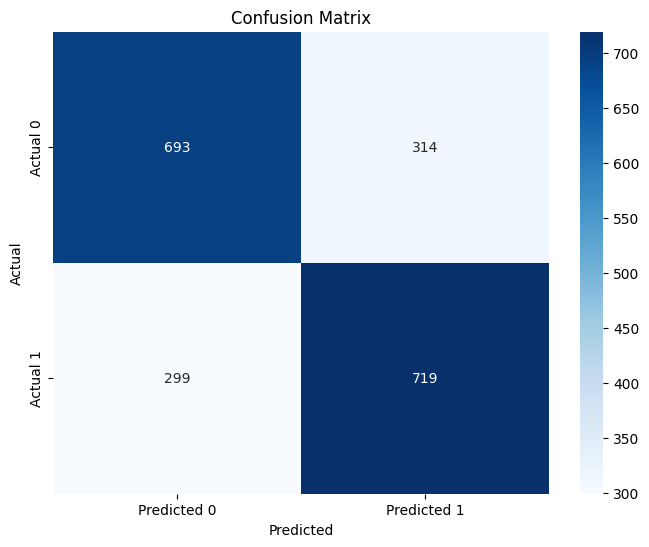

In [183]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for train data (method 3)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
y_train_pred = cross_val_predict(grid_search_clf.best_estimator_, X_train, y_train, cv=3)
print(len(y_train_pred))
print(len(y_train))

# print confusion matrix
confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(y_train, y_train_pred)

In [184]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# grid search for random forest classifier 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_RF_clf = GridSearchCV(forest_clf, param_grid, cv=3,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_RF_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [185]:
grid_search_RF_clf.best_params_
grid_search_RF_clf.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)

In [186]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for Train data (method 2)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
print(grid_search_RF_clf.best_estimator_)
print(grid_search_RF_clf.best_params_)
cross_val_score(grid_search_RF_clf.best_estimator_, X_train, y_train, cv=3 , scoring="accuracy")

RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)
{'max_features': 8, 'n_estimators': 30}


array([0.77037037, 0.7837037 , 0.80148148])

In [187]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate accuracy for train data (method 3)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
y_train_pred = cross_val_predict(grid_search_RF_clf.best_estimator_, X_train, y_train, cv=3)
print(len(y_train_pred))
print(len(y_train))

# print confusion matrix
confusion_matrix(y_train, y_train_pred)

2025
2025


array([[799, 208],
       [227, 791]])